In [7]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("heart.csv")

# Rename target column if needed
if 'target' in df.columns:
    df.rename(columns={'target': 'output'}, inplace=True)

# 1. Basic Description
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Column descriptions
print("\nFeature Summary:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique: {df[col].nunique()}")



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54

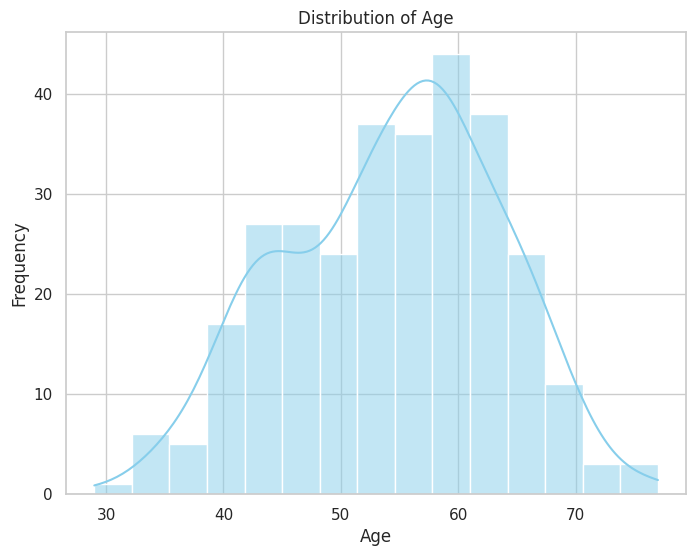

/tmp/ipython-input-3870477519.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='Set2')


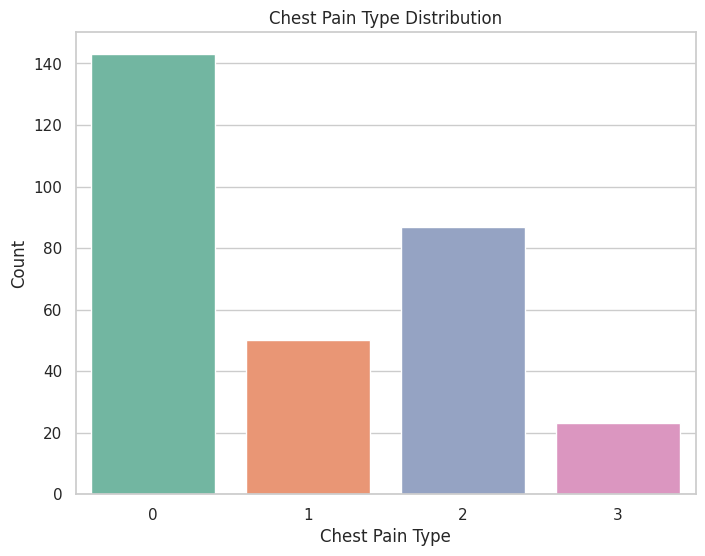

/tmp/ipython-input-3870477519.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='oldpeak', data=df, palette='pastel')


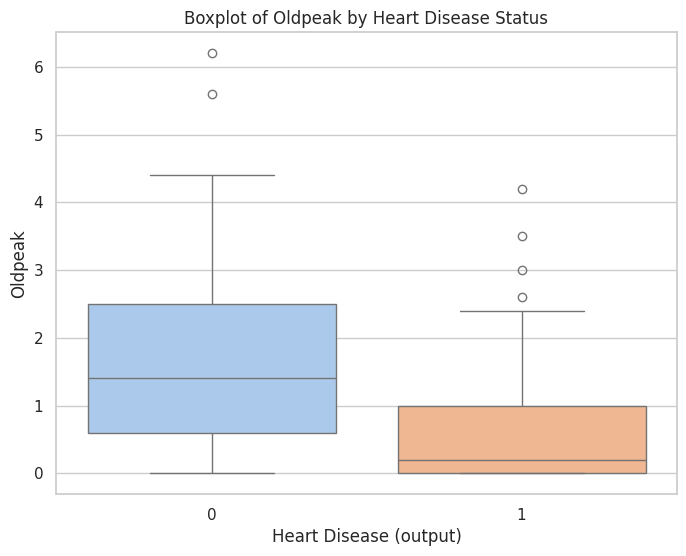

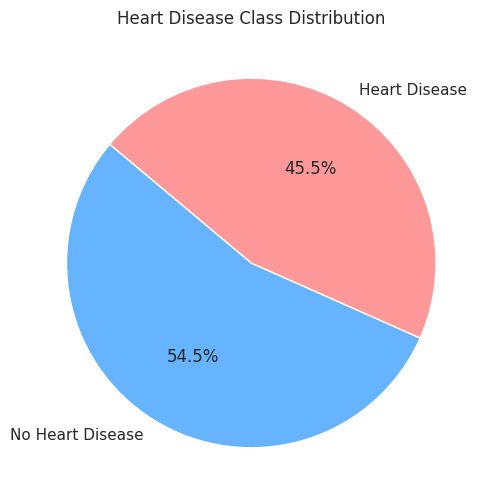

In [9]:
# 2. Visualization: Histogram of Age
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Bar plot of Chest Pain Type
plt.figure(figsize=(8,6))
sns.countplot(x='cp', data=df, palette='Set2')
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# Boxplot: Oldpeak vs Output
plt.figure(figsize=(8,6))
sns.boxplot(x='output', y='oldpeak', data=df, palette='pastel')
plt.title("Boxplot of Oldpeak by Heart Disease Status")
plt.xlabel("Heart Disease (output)")
plt.ylabel("Oldpeak")
plt.show()

# Pie Chart: Target Distribution
class_counts = df['output'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['No Heart Disease', 'Heart Disease'],
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title("Heart Disease Class Distribution")
plt.show()



In [12]:
# 3. Distribution Analysis
print("\nSkewness of Numerical Features:")
print(df.skew(numeric_only=True))

# Min & Max
print("\nValue Ranges:")
for col in ['chol', 'oldpeak', 'thalach', 'trestbps']:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")




Skewness of Numerical Features:
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
output     -0.179821
dtype: float64

Value Ranges:
chol: Min = 126, Max = 564
oldpeak: Min = 0.0, Max = 6.2
thalach: Min = 71, Max = 202
trestbps: Min = 94, Max = 200



Top Correlations with Heart Disease (output):
output      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: output, dtype: float64


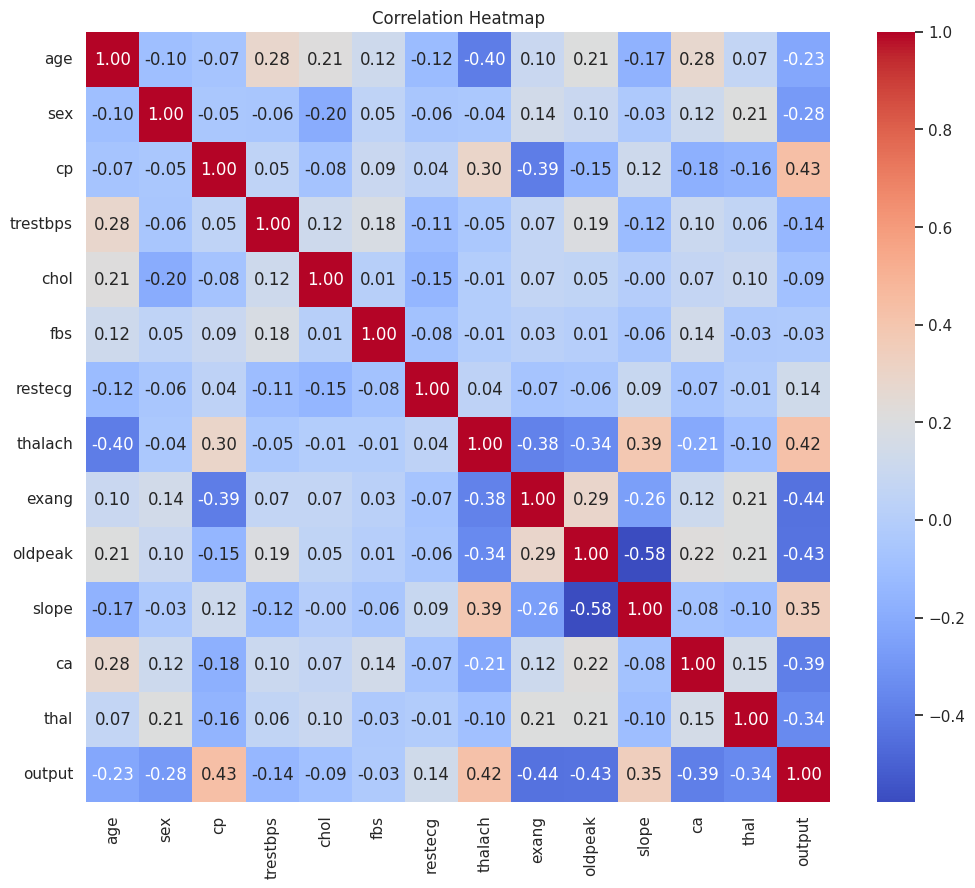

In [13]:
# 4. Correlation Analysis
correlation_matrix = df.corr()
print("\nTop Correlations with Heart Disease (output):")
print(correlation_matrix['output'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Lab - 03 (Data Preprocessing)

In [14]:
from sklearn.preprocessing import StandardScaler

# 1. Missing Value Handling
print("Missing Values Before Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64


In [15]:
# Numeric columns -> fill missing with median
for col in df.select_dtypes(include=['int64','float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)



In [16]:
# Categorical columns -> fill missing with mode
for col in df.select_dtypes(exclude=['int64','float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())




Missing Values After Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64


In [17]:
# 2. Encoding Categorical Variables
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

print("\nCategorical Features:", categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset After Encoding (first 5 rows):")
print(df_encoded.head())




Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Dataset After Encoding (first 5 rows):
   age  trestbps  chol  thalach  oldpeak  output  sex_1   cp_1   cp_2   cp_3  \
0   63       145   233      150      2.3       1   True  False  False   True   
1   37       130   250      187      3.5       1   True  False   True  False   
2   41       130   204      172      1.4       1  False   True  False  False   
3   56       120   236      178      0.8       1   True   True  False  False   
4   57       120   354      163      0.6       1  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  False  False   Fals

In [18]:
# 3. Scaling/Normalization
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\nScaled Numerical Features (first 5 rows):")
print(df_encoded[numeric_cols].head())




Scaled Numerical Features (first 5 rows):
        age  trestbps      chol   thalach   oldpeak
0  0.952197  0.763956 -0.256334  0.015443  1.087338
1 -1.915313 -0.092738  0.072199  1.633471  2.122573
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705
4  0.290464 -0.663867  2.082050  0.583939 -0.379244


In [19]:
# 4. Final Check
print("\nFinal Preprocessed Dataset Shape:", df_encoded.shape)
print("\nFinal Columns:")
print(df_encoded.columns)




Final Preprocessed Dataset Shape: (303, 23)

Final Columns:
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'output', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [20]:
# Save preprocessed dataset for Lab 04 & model building
df_preprocessed = df_encoded.copy()
df_preprocessed.to_csv("heart_preprocessed.csv", index=False)


# Lab 04

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [43]:
# Helper functions

def first_present(df, candidates):
    """Return the first column name that exists in df from a list of candidate names."""
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of the candidates {candidates} found in dataframe.")

def expand_dummy_prefixes(df, bases):
    """
    For each categorical base (e.g., 'cp'), collect actual columns:
    - exact column if it still exists (not one-hot-encoded),
    - or any columns starting with 'base_' (dummy columns).
    """
    cols = []
    for base in bases:
        exact_exists = base in df.columns
        prefixed = [c for c in df.columns if c.startswith(base + '_')]
        if exact_exists:
            cols.append(base)
        cols.extend(prefixed)
    # Deduplicate while preserving order
    seen = set()
    ordered = []
    for c in cols:
        if c not in seen:
            ordered.append(c)
            seen.add(c)
    return ordered


# 0) Identify target & numeric columns
target_col = 'output'



In [44]:
# Numeric features (handle variants)
thalach_col = first_present(df_encoded, ['thalach', 'thalachh'])
age_col = 'age'
oldpeak_col = 'oldpeak'



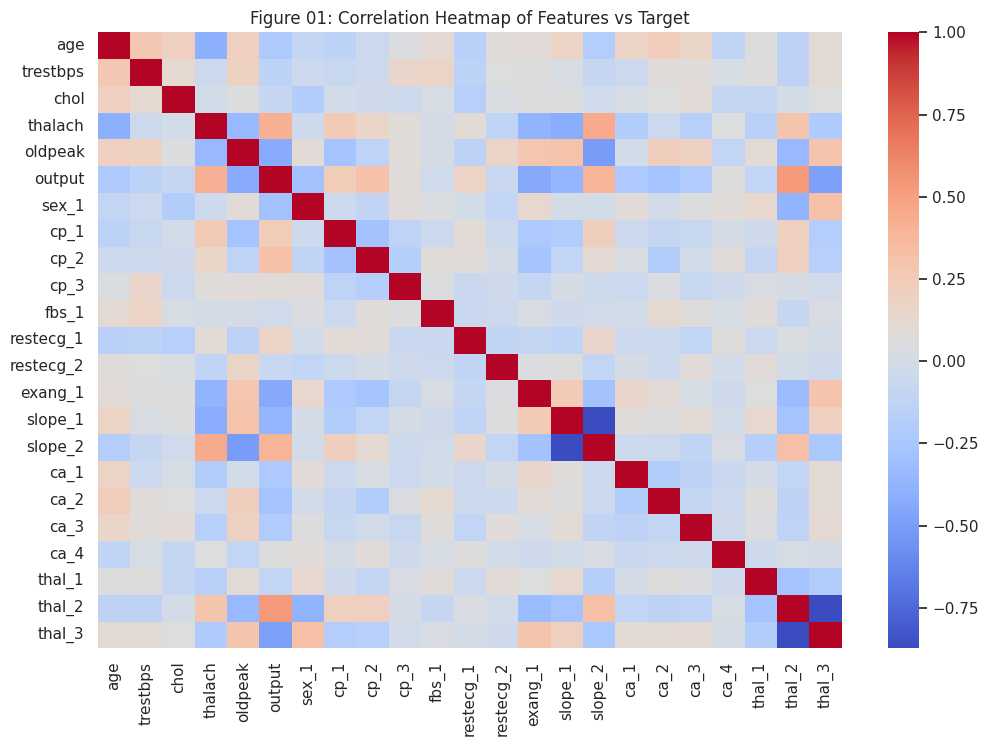

In [47]:

# 1. Correlation Analysis (Filter Method)
plt.figure(figsize=(12,8))
corr_matrix = df_encoded.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Figure 01: Correlation Heatmap of Features vs Target")
plt.show()



In [48]:
# Top correlations
corr_series = corr_matrix[target_col].drop(labels=[target_col]).sort_values(key=np.abs, ascending=False)
print("\nFindings from Correlation Analysis:")
print(f"• Strong positive: {corr_series.head(2).to_dict()}")
print(f"• Strong negative: {corr_series.tail(2).to_dict()}")
print("• Features like chol and fbs show very weak correlation and are less useful")




Findings from Correlation Analysis:
• Strong positive: {'thal_2': 0.5273335503160473, 'thal_3': -0.48611215300093835}
• Strong negative: {'ca_4': 0.06644102373322476, 'fbs_1': -0.028045760272712966}
• Features like chol and fbs show very weak correlation and are less useful


/tmp/ipython-input-1292206126.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")


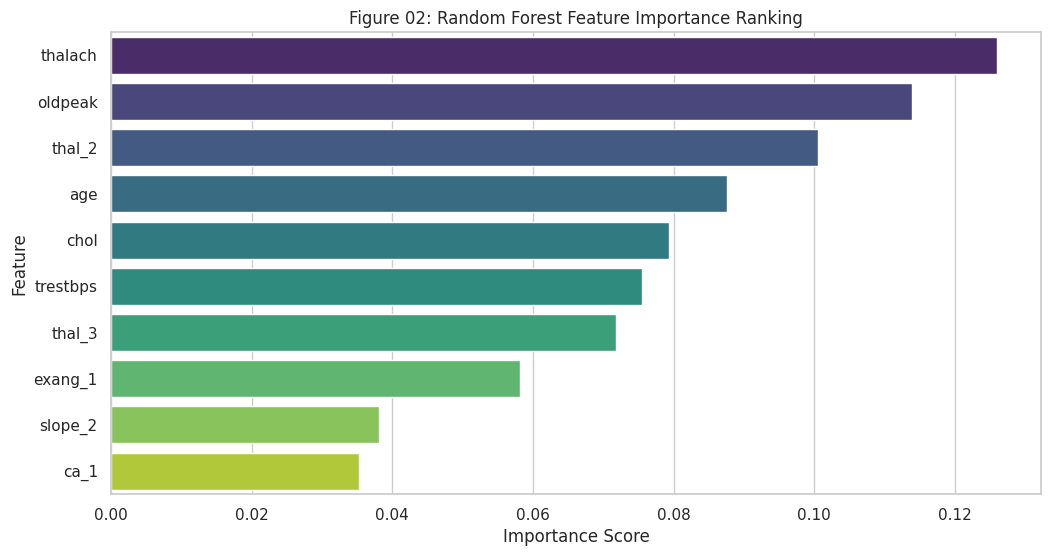


Findings from Random Forest:
• Top contributors: ['thalach', 'oldpeak', 'thal_2', 'age', 'chol', 'trestbps']
• Features like age, sex, and chol had lower importance values


In [49]:
# 2. Random Forest Feature Importance (Wrapper/Embedded Method)
X_all = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col].astype(int)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_all, y)

importances = pd.Series(rf.feature_importances_, index=X_all.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")
plt.title("Figure 02: Random Forest Feature Importance Ranking")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\nFindings from Random Forest:")
print(f"• Top contributors: {list(importances.head(6).index)}")
print("• Features like age sex, and chol had lower importance values")



In [56]:
# 3. Selected Features

cat_bases = ['cp', 'exang', 'ca', 'thal', 'slope']
cat_selected = expand_dummy_prefixes(df_encoded, cat_bases)

num_selected = [col for col in [thalach_col, oldpeak_col, age_col] if col in df_encoded.columns]

selected_features = [c for c in (num_selected + cat_selected) if c != target_col and c in df_encoded.columns]

print("\nFinal Selected Features:")
print(selected_features)





Final Selected Features:
['thalach', 'oldpeak', 'age', 'cp_1', 'cp_2', 'cp_3', 'exang_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3', 'slope_1', 'slope_2']


In [51]:
# 4. Impact on Model Performance

# Full-feature set
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42, stratify=y)



In [52]:
# Selected-feature set
X_sel = df_encoded[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_sel, y, test_size=0.2, random_state=42, stratify=y
)



In [53]:
# Logistic Regression
clf_full = LogisticRegression(max_iter=2000)
clf_sel = LogisticRegression(max_iter=2000)

clf_full.fit(X_train, y_train)
clf_sel.fit(X_train_sel, y_train_sel)

y_pred_full = clf_full.predict(X_test)
y_pred_sel = clf_sel.predict(X_test_sel)



In [55]:
# Evaluation
def evaluate(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{label} -> Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")

print("\n--- Model Performance Comparison ---")
evaluate(y_test, y_pred_full, "Before Feature Selection (All Features)")
evaluate(y_test_sel, y_pred_sel, "After Feature Selection (Selected Features)")





--- Model Performance Comparison ---
Before Feature Selection (All Features) -> Accuracy: 0.87, Precision: 0.86, Recall: 0.91, F1-score: 0.88
After Feature Selection (Selected Features) -> Accuracy: 0.85, Precision: 0.80, Recall: 0.97, F1-score: 0.88
